In [ ]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tabulate import tabulate
import warnings

%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [ ]:
def read_car_data():
    car_data = pd.read_csv('car_data_dummy.csv', delimiter=';')
    return car_data

In [ ]:
car_data = read_car_data()
car_data.head()

,YEAR,CAR TYPE,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
0,2010,TOYOTA AVANZA E,STATION WAGON,1.300,4,MT,BENSIN,8.700,6.400,8.700,32.200,193
1,2010,TOYOTA AVANZA G,STATION WAGON,1.500,4,MT,BENSIN,9.300,6.700,9.000,31.400,208
2,2010,TOYOTA AVANZA G,STATION WAGON,1.500,4,AT,BENSIN,10.000,7.400,10.000,23.500,233
3,2013,TOYOTA AVANZA E,STATION WAGON,1.300,4,MT,BENSIN,8.600,6.200,8.200,34.600,192
4,2013,TOYOTA AVANZA E,STATION WAGON,1.300,4,AT,BENSIN,9.000,6.400,8.700,32.200,199


In [ ]:
car_data.tail()

,YEAR,CAR TYPE,VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
26,2020,TOYOTA CALYA E,STATION WAGON,1.200,4,MT,BENSIN,5.000,4.200,5.000,47.600,100
27,2020,TOYOTA CALYA G,STATION WAGON,1.200,4,MT,BENSIN,5.100,4.300,5.100,47.700,101
28,2020,TOYOTA CALYA G,STATION WAGON,1.200,4,AT,BENSIN,5.200,4.300,5.200,45.200,105
29,2020,TOYOTA CALYA G,STATION WAGON,1.200,4,MT,BENSIN,5.000,4.200,5.000,47.600,100
30,2020,TOYOTA CALYA G SPORTY,STATION WAGON,1.200,4,AT,BENSIN,5.300,4.400,5.300,45.300,106


In [ ]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YEAR                   31 non-null     int64  
 1   CAR TYPE               31 non-null     object 
 2   VEHICLE CLASS          31 non-null     object 
 3   ENGINE SIZE (L)        31 non-null     float64
 4   CYLINDERS              31 non-null     int64  
 5   TRANSMISSION           31 non-null     object 
 6   FUEL TYPE              31 non-null     object 
 7   FUEL CONSUMPTION CITY  31 non-null     float64
 8   FUEL CONSUMPTION HWY   31 non-null     float64
 9   COMB (L/100 km)        31 non-null     float64
 10  COMB (mpg)             31 non-null     float64
 11  CO2 EMISSIONS          31 non-null     int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 3.0+ KB


In [ ]:
car_data.describe()

,YEAR,ENGINE SIZE (L),CYLINDERS,FUEL CONSUMPTION CITY,FUEL CONSUMPTION HWY,COMB (L/100 km),COMB (mpg),CO2 EMISSIONS
count,31.000,31.000,31.000,31.000,31.000,31.000,31.000,31.000
mean,2017.194,1.255,3.742,6.605,5.186,6.500,41.588,142.323
std,4.094,0.175,0.445,1.982,1.198,2.015,9.675,51.158
min,2010.000,1.000,3.000,4.600,4.000,4.400,23.500,88.000
25%,2013.000,1.200,3.500,5.000,4.165,5.000,32.200,100.500
50%,2020.000,1.200,4.000,5.200,4.300,5.200,45.300,106.000
75%,2020.000,1.400,4.000,8.750,6.400,8.700,47.700,196.000
max,2022.000,1.500,4.000,10.000,7.400,10.000,53.500,233.000


In [ ]:
car_data.columns

Index(['YEAR', 'CAR TYPE', 'VEHICLE CLASS', 'ENGINE SIZE (L)', 'CYLINDERS',
       'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY',
       'FUEL CONSUMPTION HWY', 'COMB (L/100 km)', 'COMB (mpg)',
       'CO2 EMISSIONS'],
      dtype='object')

In [ ]:
car_data.isna().sum()

YEAR                     0
CAR TYPE                 0
VEHICLE CLASS            0
ENGINE SIZE (L)          0
CYLINDERS                0
TRANSMISSION             0
FUEL TYPE                0
FUEL CONSUMPTION CITY    0
FUEL CONSUMPTION HWY     0
COMB (L/100 km)          0
COMB (mpg)               0
CO2 EMISSIONS            0
dtype: int64

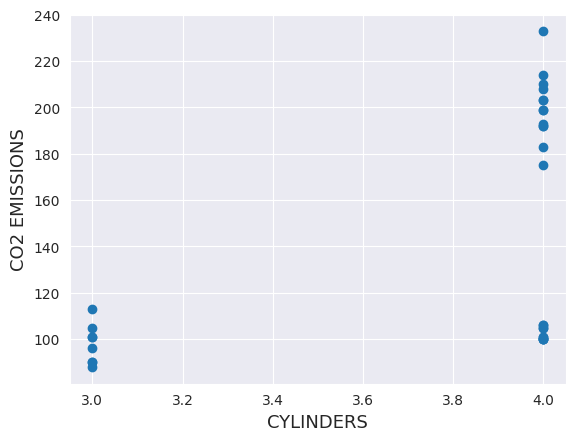

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['CYLINDERS'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('CYLINDERS', fontsize=13)
plt.show()

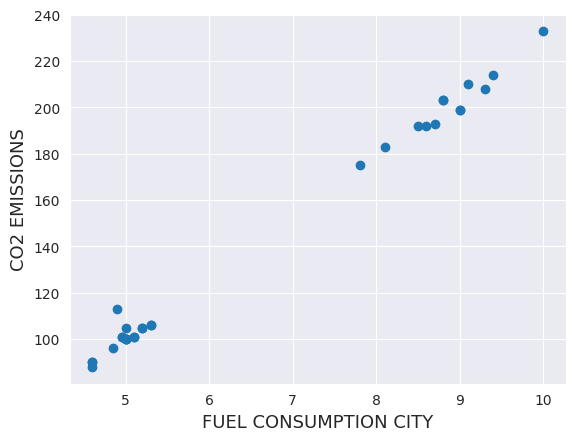

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['FUEL CONSUMPTION CITY'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('FUEL CONSUMPTION CITY', fontsize=13)
plt.show()

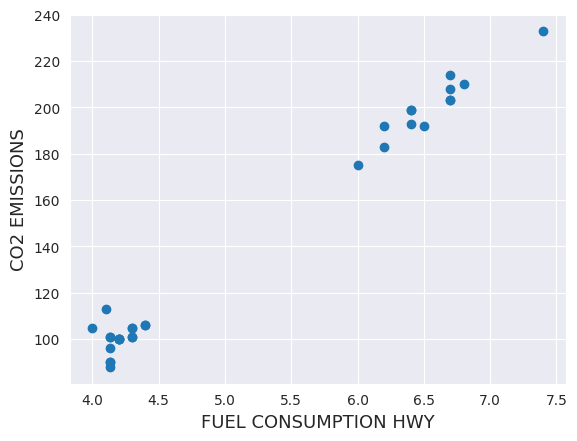

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['FUEL CONSUMPTION HWY'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('FUEL CONSUMPTION HWY', fontsize=13)
plt.show()

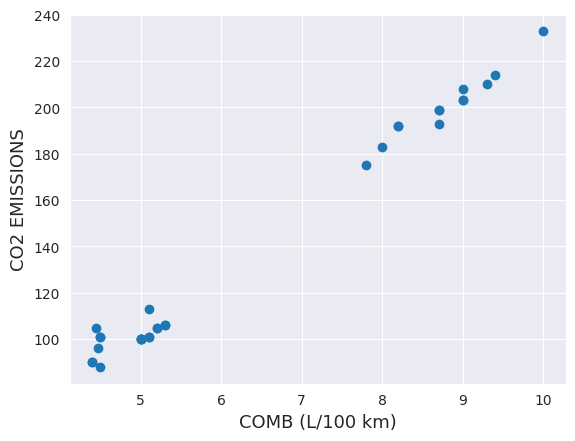

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['COMB (L/100 km)'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('COMB (L/100 km)', fontsize=13)
plt.show()

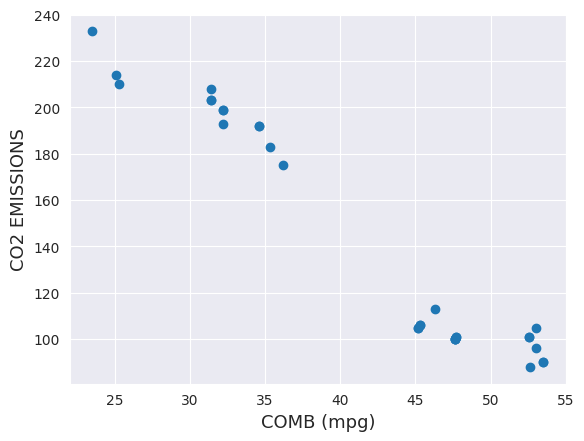

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['COMB (mpg)'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('COMB (mpg)', fontsize=13)
plt.show()

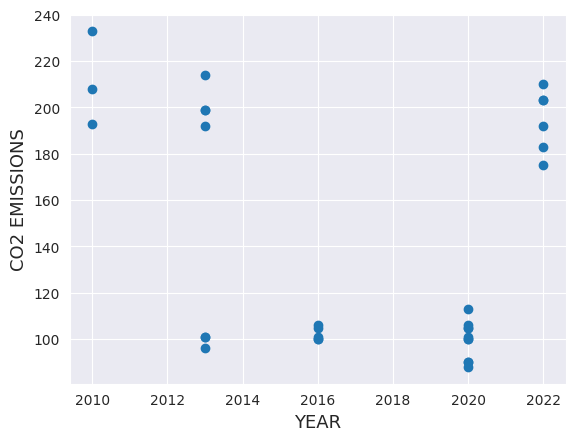

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['YEAR'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('YEAR', fontsize=13)
plt.show()

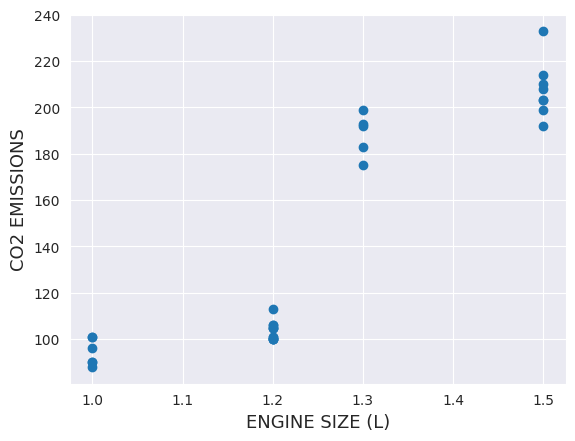

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x = car_data['ENGINE SIZE (L)'], y = car_data['CO2 EMISSIONS'])
plt.ylabel('CO2 EMISSIONS', fontsize=13)
plt.xlabel('ENGINE SIZE (L)', fontsize=13)
plt.show()

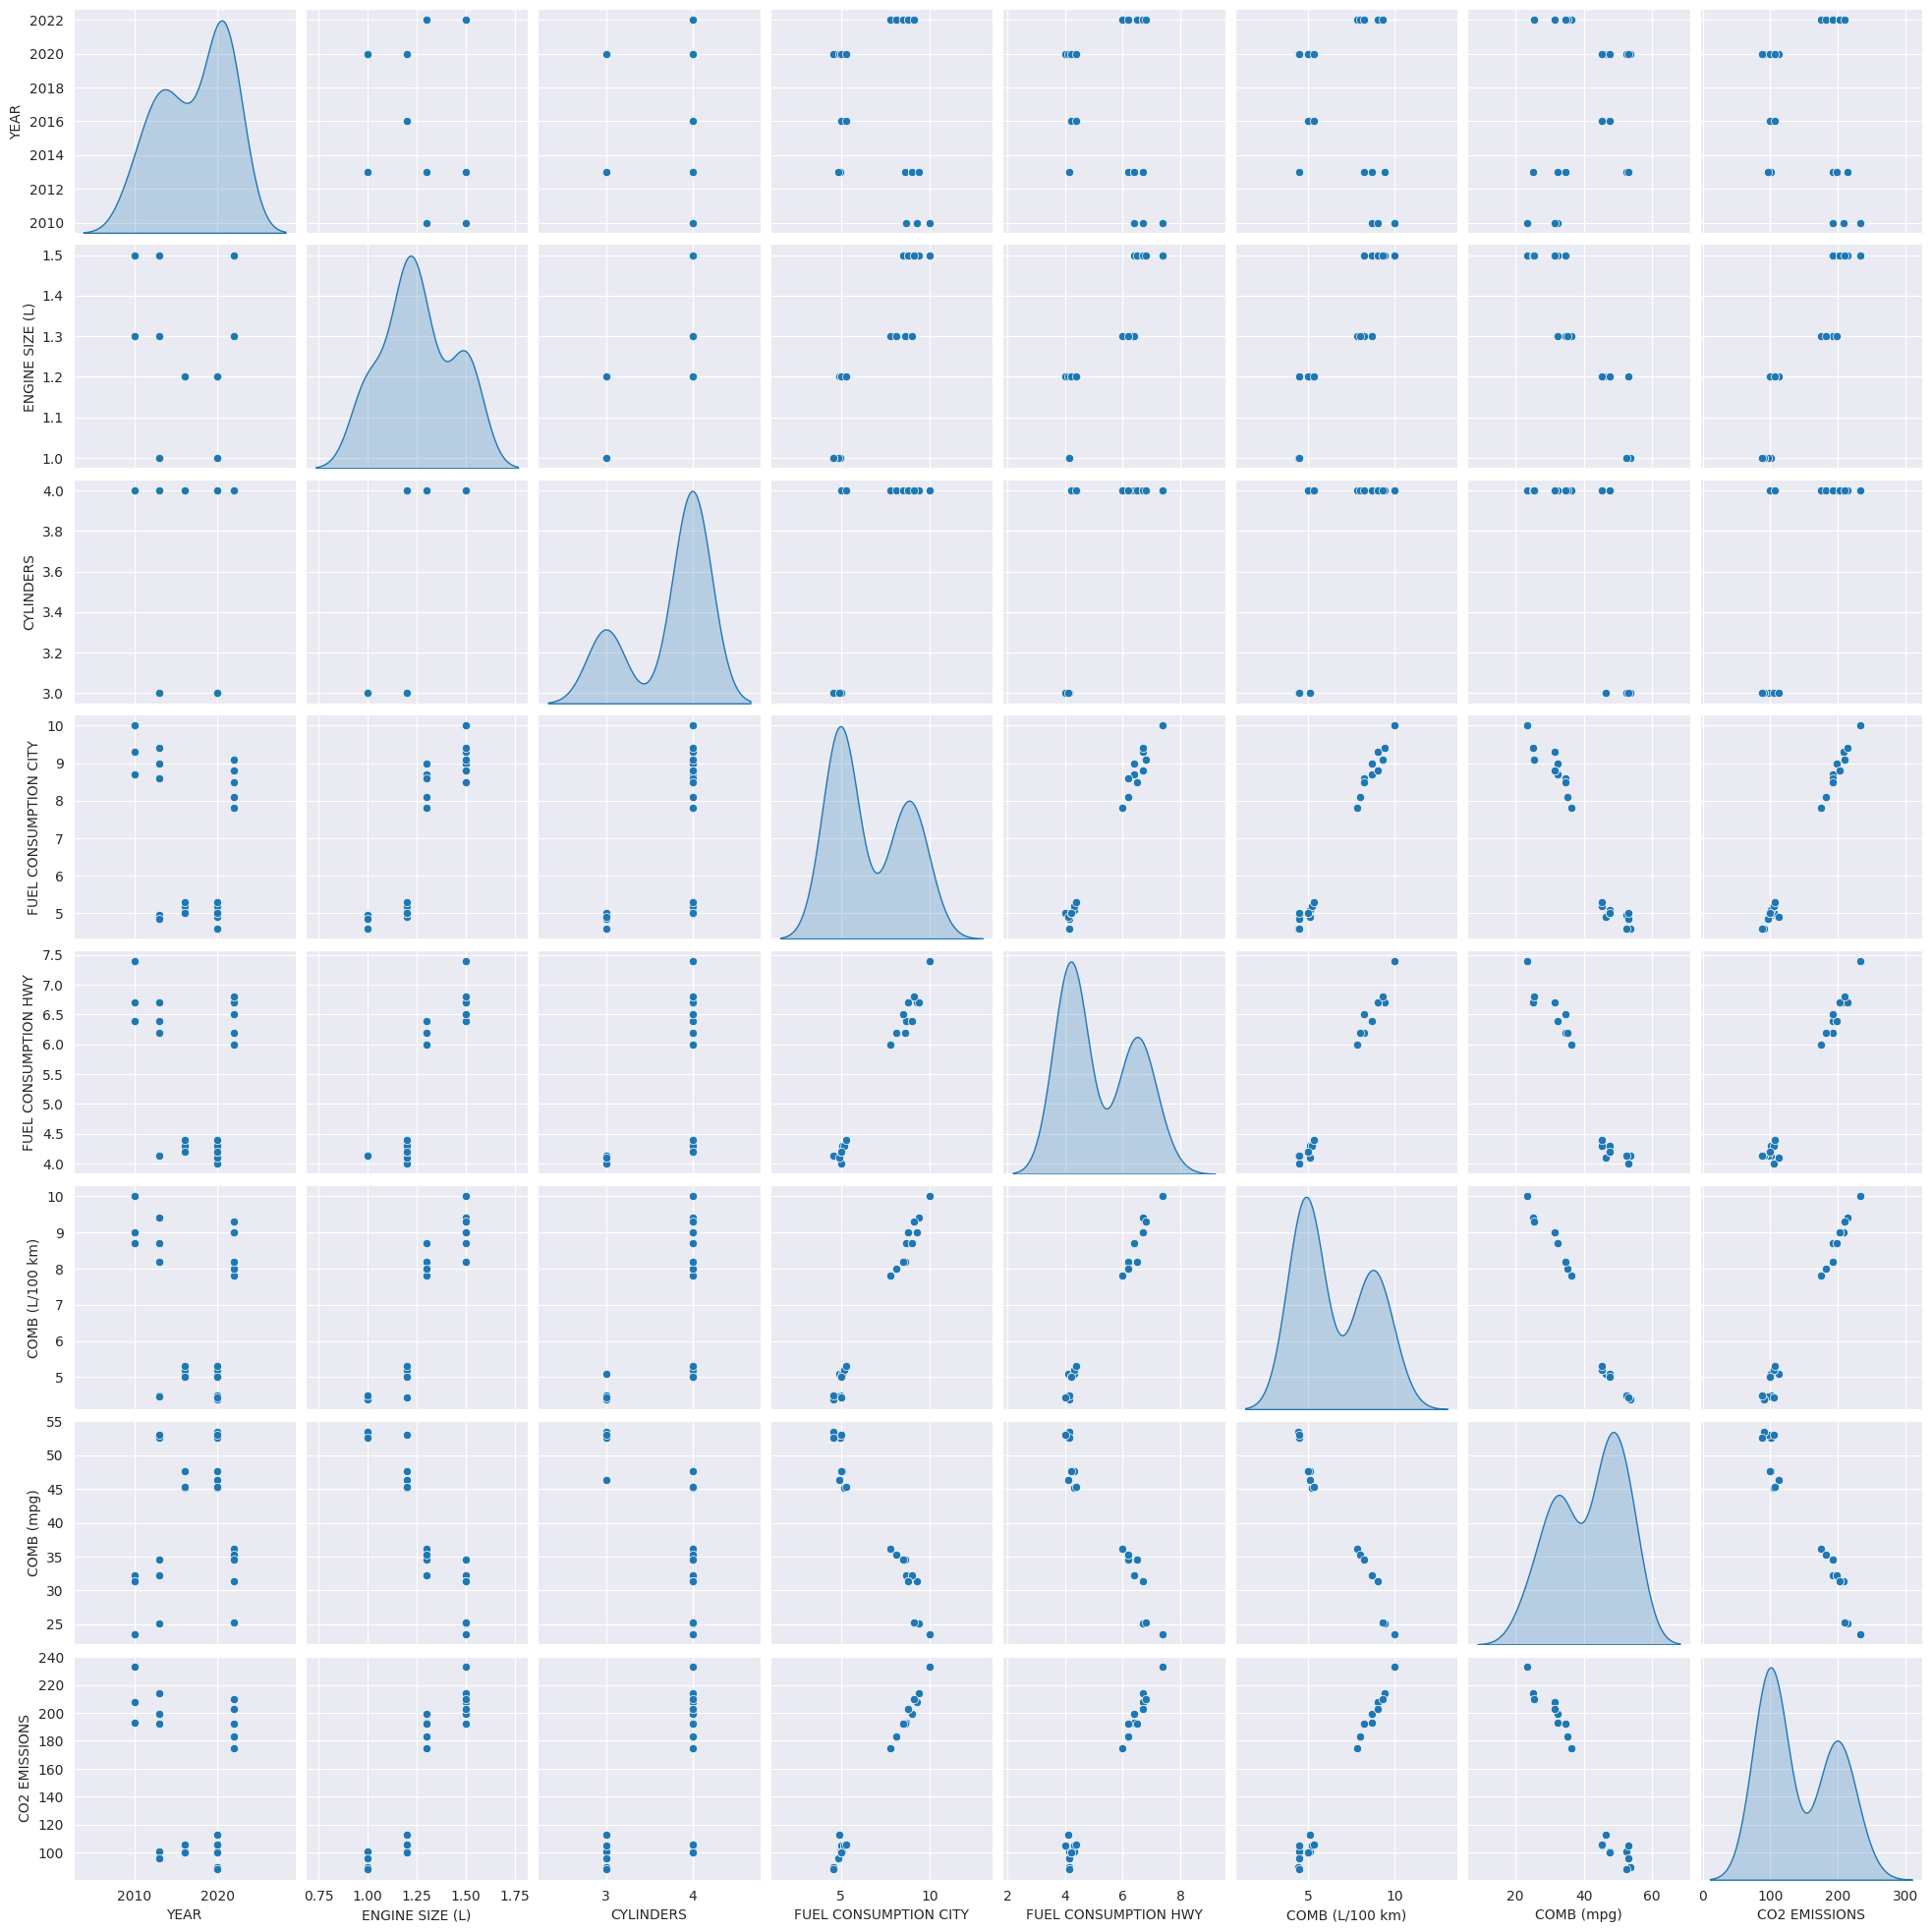

In [ ]:
sns.pairplot(car_data[['CAR TYPE', 'YEAR', 'VEHICLE CLASS', 'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY'
                , 'FUEL CONSUMPTION HWY', 'COMB (L/100 km)', 'COMB (mpg)', 'CO2 EMISSIONS']], diag_kind='kde')

<Axes: >

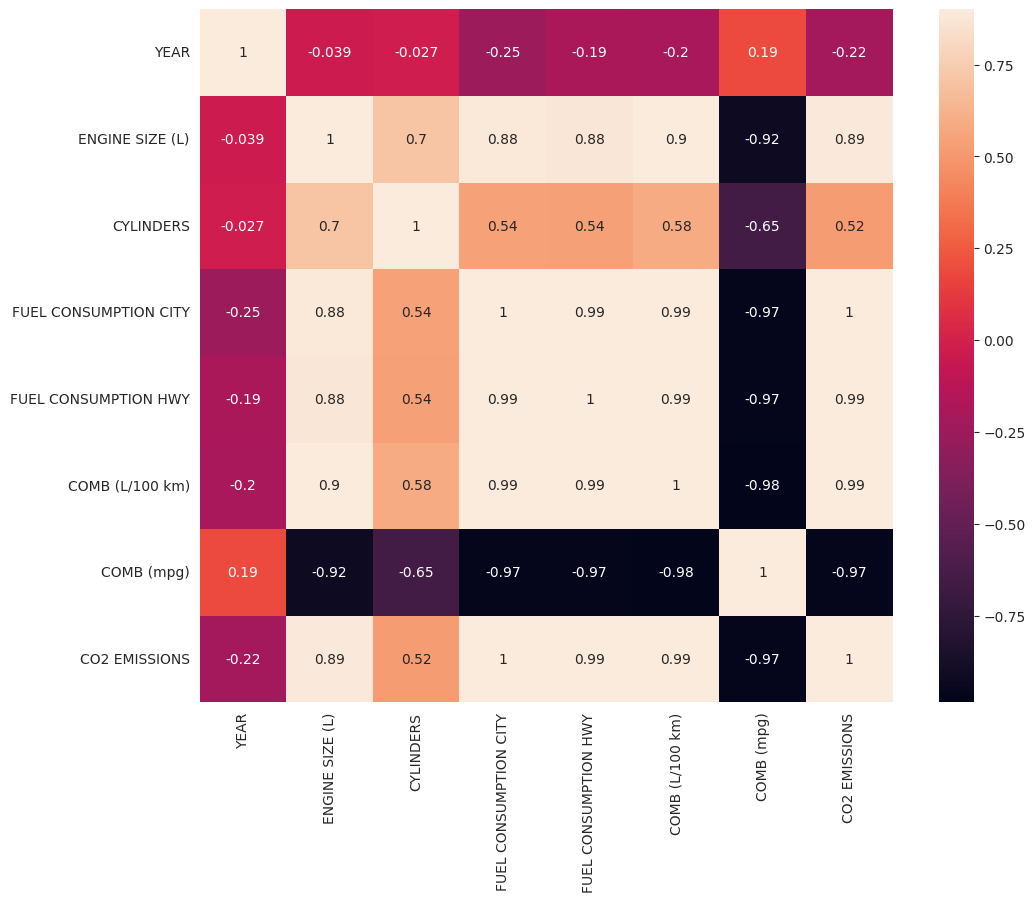

In [ ]:
#Correlation map to see how features are correlated with SalePrice
corrmat = car_data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [ ]:
# Max limit input
max_limit_input = float(input("Set the maximum limit of carbon emissions per day (gram): "))
# Set the user car's detail
mileage = float(input("Enter your car mileage in km: "))
car_type = input("Enter your car type: ").upper()
car_year = int(input("Enter your car year: "))
fuel_type = input("Enter your car fuel type: ").upper()
car_transmission = input("Enter your car transmission: ").upper()

#usercar = pd.DataFrame()
usercar = car_data.loc[(car_data['CAR TYPE'] == car_type) & (car_data['YEAR'] == car_year) & (car_data['FUEL TYPE'] == fuel_type) & (car_data['TRANSMISSION'] == car_transmission)]

Set the maximum limit of carbon emissions per day (gram): 100
Enter your car mileage in km: 1
Enter your car type: toyota avanza e
Enter your car year: 2010
Enter your car fuel type: bensin
Enter your car transmission: mt


In [ ]:
lect = LabelEncoder()
car_data['CAR TYPE'] = lect.fit_transform(car_data['CAR TYPE'])
usercar['CAR TYPE'] = lect.transform(usercar['CAR TYPE'])

ley = LabelEncoder()
car_data['YEAR'] = ley.fit_transform(car_data['YEAR'])
usercar['YEAR'] = ley.transform(usercar['YEAR'])

levc = LabelEncoder()
car_data['VEHICLE CLASS'] = levc.fit_transform(car_data['VEHICLE CLASS'])
usercar['VEHICLE CLASS'] = levc.transform(usercar['VEHICLE CLASS'])

lees = LabelEncoder()
car_data['ENGINE SIZE (L)'] = levc.fit_transform(car_data['ENGINE SIZE (L)'])
usercar['ENGINE SIZE (L)'] = levc.transform(usercar['ENGINE SIZE (L)'])

lecs = LabelEncoder()
car_data['CYLINDERS'] = lecs.fit_transform(car_data['CYLINDERS'])
usercar['CYLINDERS'] = lecs.transform(usercar['CYLINDERS'])

letr = LabelEncoder()
car_data['TRANSMISSION'] = letr.fit_transform(car_data['TRANSMISSION'])
usercar['TRANSMISSION'] = letr.transform(usercar['TRANSMISSION'])

left = LabelEncoder()
car_data['FUEL TYPE'] = left.fit_transform(car_data['FUEL TYPE'])
usercar['FUEL TYPE'] = left.transform(usercar['FUEL TYPE'])

In [ ]:
labels = np.array(car_data['CO2 EMISSIONS'])
car_data = car_data.drop('CO2 EMISSIONS', axis = 1)
real = np.array(usercar['CO2 EMISSIONS'])
usercar = usercar.drop('CO2 EMISSIONS', axis = 1)
datalist = list(car_data.columns)
car_data = np.array(car_data)

In [ ]:
# Select relevant features for training the model
features = ['YEAR', 'CAR TYPE', 'VEHICLE CLASS', 'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE', 'FUEL CONSUMPTION CITY', 'FUEL CONSUMPTION HWY', 'COMB (mpg)', 'COMB (L/100 km)']
target = 'CO2 EMISSIONS'

In [ ]:
train_data, test_data, train_target, test_target = train_test_split(
        car_data, labels, test_size=0.2, random_state=42
        ) #TEST SIZE 0.3

In [ ]:
# Define Neural Network
model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(len(features),)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

# Optimizer 
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 512)               6144      
                                                                 
 dense_31 (Dense)            (None, 512)               262656    
                                                                 
 dense_32 (Dense)            (None, 256)               131328    
                                                                 
 dense_33 (Dense)            (None, 128)               32896     
                                                                 
 dense_34 (Dense)            (None, 1)                 129       
                                                                 
Total params: 433,153
Trainable params: 433,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(train_data, train_target, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 24308.4434 - val_loss: 21714.8496
Epoch 2/100
1/1 [==============================] - 0s 37ms/step - loss: 22486.3066 - val_loss: 20084.6758
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 20830.4629 - val_loss: 18203.2578
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 18917.4375 - val_loss: 16079.0811
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 16732.7598 - val_loss: 13714.3174
Epoch 6/100
1/1 [==============================] - 0s 42ms/step - loss: 14279.4785 - val_loss: 11215.1582
Epoch 7/100
1/1 [==============================] - 0s 42ms/step - loss: 11645.7500 - val_loss: 8831.9639
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 9054.4648 - val_loss: 7008.4297
Epoch 9/100
1/1 [==============================] - 0s 38ms/step - loss: 6922.4697 - val_loss: 6343.4487
Epoch 10/100
1/1 [==============================] - 0

In [ ]:
prediction = model.predict(test_data)
print(prediction)

1/1 [==============================] - 0s 95ms/step
[[102.31055 ]
 [ 94.27586 ]
 [103.325134]
 [ 91.5689  ]
 [176.18198 ]
 [191.1629  ]
 [100.52502 ]]


In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [CO2 EMISSION]')
  plt.legend()
  plt.grid(True)

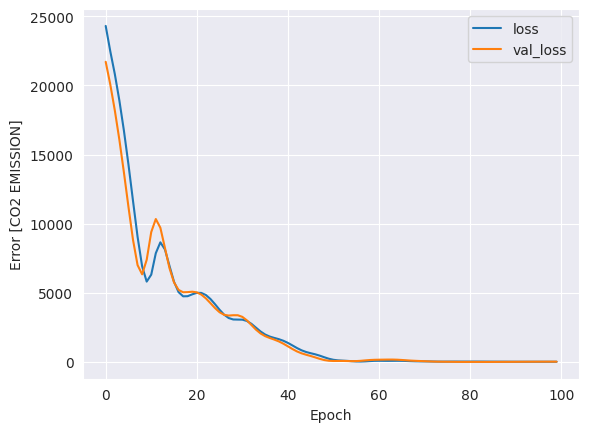

In [ ]:
plot_loss(history)

In [ ]:
# Function to read car data from the CSV database
def read_car_data():
    car_data = {}
    with open('car_data_dummy.csv', 'r') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            car_type = row['CAR TYPE']
            car_year = int(row['YEAR'])
            vehicle_class = row['VEHICLE CLASS']
            engine_size = float(row['ENGINE SIZE (L)'])
            cylinders = int(row['CYLINDERS'])
            transmission = row['TRANSMISSION']
            fuel_type = row['FUEL TYPE']
            fuel_consumption_city = float(row['FUEL CONSUMPTION CITY'])
            fuel_consumption_highway = float(row['FUEL CONSUMPTION HWY'])
            comb1 = float(row['COMB (L/100 km)'])
            comb2 = float(row['COMB (mpg)'])
            co2_emission = float(row['CO2 EMISSIONS'])
            if car_type not in car_data:
                car_data[car_type] = []
            car_data[car_type].append({
                    'car_year': car_year,
                    'vehicle_class': vehicle_class,
                    'engine_size' : engine_size,
                    'cylinders' : cylinders,
                    'transmission': transmission,
                    'fuel_type': fuel_type,
                    'fuel_consumption_city': fuel_consumption_city,
                    'fuel_consumption_highway': fuel_consumption_highway,
                    'comb1' : comb1,
                    'comb2' : comb2,
                    'co2_emission': co2_emission
            })
    return car_data

In [ ]:
# Function to calculate carbon emissions
def calculate_carbon_emissions(car_type, car_year, mileage, car_data, emission):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    
    if car_type in car_data:
        cars = car_data[car_type]
        for car in cars:
            if car['car_year'] == car_year:
                #co2_emission = car['co2_emission']
                #total_emissions = mileage * co2_emission
                total_emissions = mileage * emission
                return total_emissions
    return None

In [ ]:
def display_warning(carbon_emission, max_limit):
    if carbon_emission is not None:
        if carbon_emission > max_limit:
            print("Warning: The carbon emissions of your car exceed the maximum limit.")
        else: 
            carbon_remainder = max_limit - carbon_emission
            print(f"Your daily carbon emission remaining: {carbon_remainder} gram")

In [ ]:
def read_alternative_data(mileage):
  alternative_emission = {}
  with open('Alternatives.csv', 'r') as file:
        reader = csv.DictReader(file, delimiter=';')
        for row in reader:
            trans_type = row['Transportation']
            trans_emission = int(row['CO2 Emission (g/km)'])
            alternative_emission[trans_type] = trans_emission * int(mileage)
  return alternative_emission

In [ ]:
# Function to recommend alternatives based on their emissions
def recommendation(alternative_emission, max_limit):
    # Sort the alternative emissions dictionary by emission values in ascending order
    sorted_alternatives = sorted(alternative_emission.items(), key=lambda x: x[1])

    # Initialize a list to store recommended alternatives
    recommended_alternatives = []

    # Iterate over the sorted alternatives and check if their emissions are within the maximum limit
    for alternative, emission in sorted_alternatives:
        if emission <= max_limit:
            recommended_alternatives.append(alternative)

    # Display the recommended alternatives
    if recommended_alternatives:
        print("\nYou have exceeded the maximum limit of carbon emissions.")
        print("\nHere are some alternative transportation options with lower CO2 emissions.")
        print("Recommended alternatives:")
        for alternative in recommended_alternatives:
            alternative_emission_str = str(alternative_emission[alternative])
            print("- " + alternative + " with total emission " + alternative_emission_str + " gram")
    else:
        print("No alternatives found within the maximum limit.")

In [ ]:
# Use the trained model for prediction
def predict(car_data):
  prediction = model.predict(usercar)
  carbonpred = prediction[0][0]

  print(f"\nPredicted CO2 Emission: {carbonpred} g/km")

  # Calculate carbon emissions
  carbon_emission = calculate_carbon_emissions(car_type, car_year, mileage, car_data, carbonpred)
  if carbon_emission is not None:
      print(f"\nTotal carbon emissions: {carbon_emission} gram.")
    
  try:
      if carbon_emission is not None:
          max_limit = float(max_limit_input) if max_limit_input else None

          # Display a warning if emissions exceed the maximum limit
          display_warning(carbon_emission, max_limit)

          # Recommend alternatives based on their emissions
          if carbon_emission > max_limit:
              alternative_emission = read_alternative_data(mileage)
              recommendation(alternative_emission, max_limit)
      else:
          print("Error: No emissions data found for the provided vehicle information.")
  except ValueError:
        print("Error: Invalid input. Please enter numeric values for mileage, vehicle year, and maximum limit.")

# Main function
def main():
    # Read vehicle data from the CSV database
    car_data = read_car_data()

    # Run the ML model training and prediction
    predict(car_data)

# Run the main function
main()

1/1 [==============================] - 0s 103ms/step

Predicted CO2 Emission: 193.88111877441406 g/km

Total carbon emissions: 193.88111877441406 gram.

You have exceeded the maximum limit of carbon emissions.

Here are some alternative transportation options with lower CO2 emissions.
Recommended alternatives:
- Train with total emission 41 gram
- Electric vehicle with total emission 53 gram


In [ ]:
# Accuracy
prediction = model.predict(usercar)
carbonpred = prediction[0][0]
error = (abs(carbonpred-real[0])/real[0])*100
accuracy = abs(error-100)
print('This model hits an accuracy of ' + str(accuracy) + '% (an error of ' + str(error) + '%)')

1/1 [==============================] - 0s 29ms/step
This model hits an accuracy of 99.54346177491499% (an error of 0.45653822508500647%)
